## Correlation anaylsis


In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read in filtered data
file_path = 'filtered_data.csv'
df = pd.read_csv(file_path)
df.shape

(26141, 47)

In [4]:
# Check for correlations between variables

In [5]:
# Compute the correlation matrix for numeric columns
corr_matrix = df[['period', 'sex', 'period_intensity', 'pain_level', 'backaches', 'bodyaches',  
                  'stomach_cramps', 'joint_pains', 'tender_breasts', 'overall_pain', 'headache',
                  'indigestion', 'bloating', 'constipation', 'diarrhea', 'nausea', 'vomiting', 
                  'appetite_loss', 'cravings_salty', 'cravings_sweet', 'weight',
                  'skin_changes', 'acne', 'tiredness', 'dizziness', 'pins_and_needles',
                  'temperature',   'fever', 'hot_flashes', 'short_of_breath', 'coughing', 
                  'insomnia', 'sleep', 'steps', 'water']].corr()

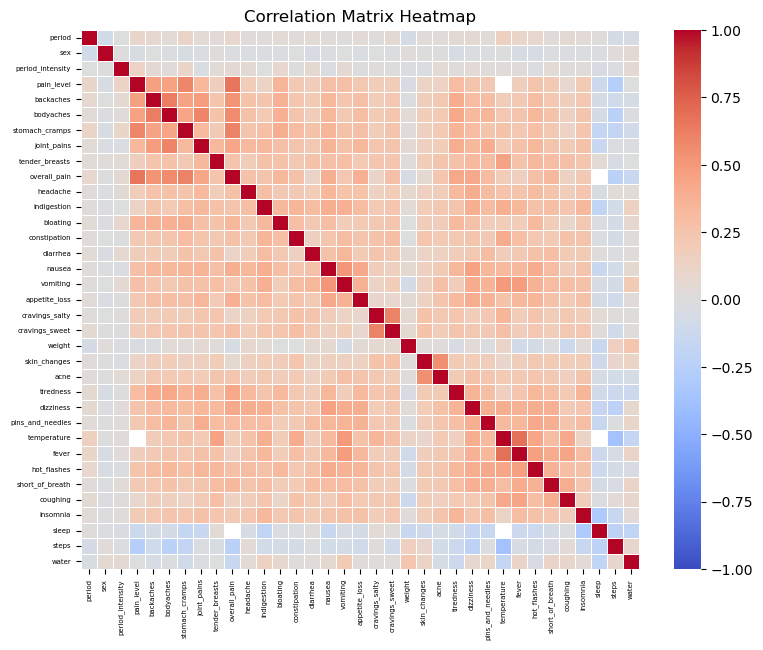

In [6]:
# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.xticks(fontsize=5)
plt.yticks(fontsize=5) 
plt.savefig('corr_heatmap.png', dpi=300)  
plt.show()

/var/folders/6c/xr_8v79n1619p54spnzz7l240000gn/T/ipykernel_41171/1751864808.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = corr_matrix.applymap(lambda x: np.nan if -0.4 <= x < 0.4 else x)


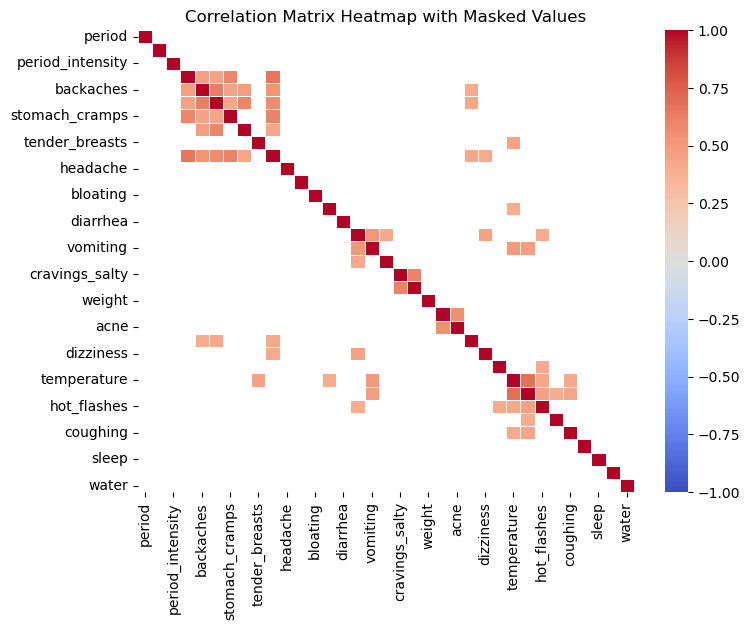

In [7]:
# Mask values in the correlation matrix that are between -0.4 and 0.4
mask = corr_matrix.applymap(lambda x: np.nan if -0.4 <= x < 0.4 else x)

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mask, annot=False, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix Heatmap with Masked Values")
plt.savefig('corr_mask_heatmap.png', dpi=300)  
plt.show()

In [8]:
# Flatten data so that there is one entry per user.
# If user ever had a symptom it should be present

# Aggregate rows with the same date
agg_user_df = df.groupby('userID').agg({
    'period': 'max',  # 1 if any entry is 1
    'sex': 'max',
    'period_intensity': 'max', 
    'pain_level': 'max', 
    'backaches': 'max', 
    'bodyaches': 'max',
    'stomach_cramps': 'max', 
    'joint_pains': 'max', 
    'tender_breasts': 'max', 
    'overall_pain': 'max',
    'headache': 'max', 
    'indigestion': 'max', 
    'bloating': 'max', 
    'constipation': 'max', 
    'diarrhea': 'max',
    'nausea': 'max',
    'vomiting': 'max',
    'appetite_loss': 'max',
    'cravings_salty': 'max',
    'cravings_sweet': 'max',
    'weight': 'mean',
    'skin_changes': 'max',
    'acne': 'max',
    'tiredness': 'max',
    'dizziness': 'max',
    'pins_and_needles': 'max', 
    'temperature': 'mean',
    'fever': 'max',
    'hot_flashes': 'max',
    'short_of_breath': 'max',
    'coughing': 'max',
    'insomnia': 'max',
    'sleep': 'mean',
    'pain_level': 'max',  # max pain_level column 
    'steps': 'mean',  #  max steps value
    'water': 'mean'
}).reset_index()

# Compute the correlation matrix for numeric columns
agg_corr_matrix = agg_user_df[['period', 'sex', 'period_intensity', 'pain_level', 'backaches', 'bodyaches',  
                               'stomach_cramps', 'joint_pains', 'tender_breasts', 'overall_pain', 'headache',
                             'indigestion', 'bloating', 'constipation', 'diarrhea', 'nausea', 'vomiting', 
                             'appetite_loss', 'cravings_salty', 'cravings_sweet', 'weight',
                             'skin_changes', 'acne', 'tiredness', 'dizziness', 'pins_and_needles',
                             'temperature',   'fever', 'hot_flashes', 'short_of_breath', 'coughing', 
                             'insomnia', 'sleep', 'steps', 'water']].corr()

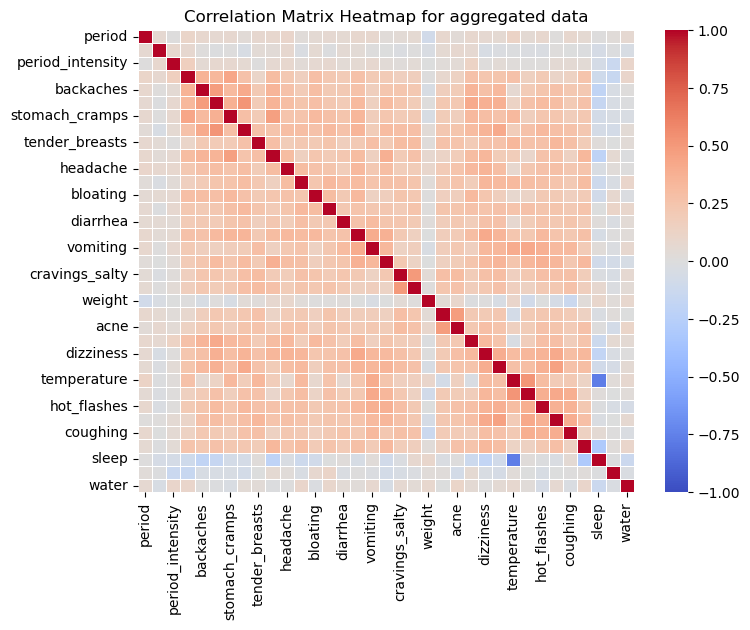

In [9]:

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(agg_corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix Heatmap for aggregated data")
plt.savefig('corr_agg_heatmap.png', dpi=300)  
plt.show()

/var/folders/6c/xr_8v79n1619p54spnzz7l240000gn/T/ipykernel_41171/2742553567.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask_agg = agg_corr_matrix.applymap(lambda x: np.nan if -0.7 <= x < 0.7 else x)


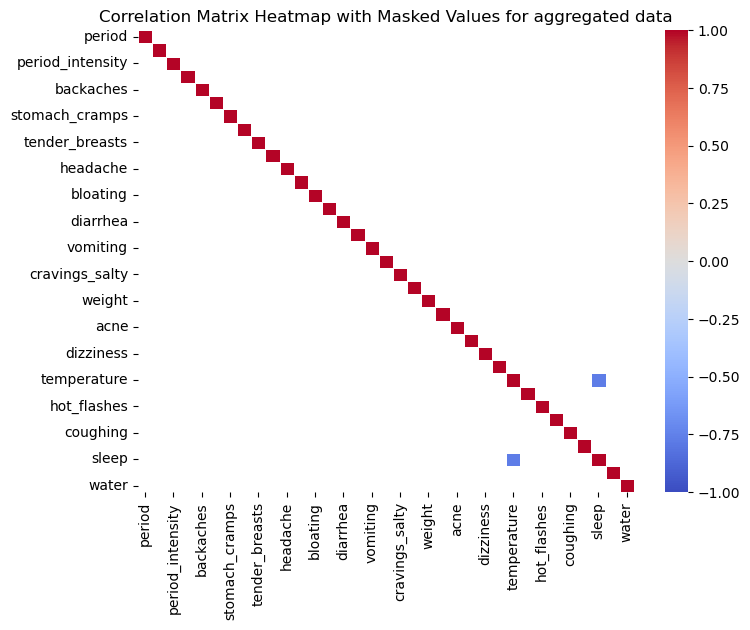

In [10]:
mask_agg = agg_corr_matrix.applymap(lambda x: np.nan if -0.7 <= x < 0.7 else x)
# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mask_agg, annot=False, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix Heatmap with Masked Values for aggregated data")
plt.savefig('corr_agg_mask_heatmap.png', dpi=300)  
plt.show()